## Machine Learning

Machine learning is a type of artificial intelligence (AI) that provides computers with the ability to learn without being explicitly programmed. Machine learning focuses on the development of computer programs that can change when exposed to new data.

Machine learning tasks are broadly classified into three main categories:
1. <b>Supervised Learning</b>
2. Unsupervised Learning
3. Reinforcement Learning

## How do we learn?

In [2]:
import pandas as pd
from IPython.display import display, HTML, Math, Latex, Image

In [3]:
df_1 = pd.DataFrame({"input_x1" : [1,2,7,100], "input_x2" : [1,3,2,1], "output_y" : [3,8,11,102]})
display(HTML(df_1.to_html(index=False)))

input_x1,input_x2,output_y
1,1,3
2,3,8
7,2,11
100,1,102


In [4]:
df_2 = pd.DataFrame({"input_x1" : [5,3], "input_x2" : [5,1], "output_y" : ["?","?"]})
display(HTML(df_2.to_html(index=False)))

input_x1,input_x2,output_y
5,5,?
3,1,?


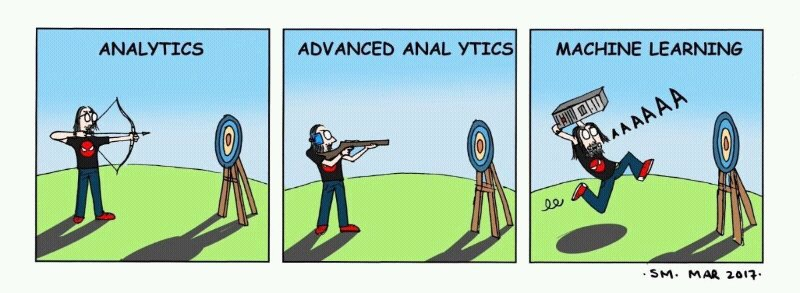

In [5]:
Image(filename='data/images/comic.jpg')

In [6]:
display(Math(r'y = F(x_1,x_2) = x_1 + 2x_2'))

<IPython.core.display.Math object>

In [25]:
df_3 = pd.DataFrame({'x1_pol_no': [1,2,3], 'x2_age' : [50,55,60], 'x3_account_value' : ["100K", "500K", "250K"], 'x4_no_of_customer_care_calls' : [0, 2, 3], 'x5_agent_surrender_rate' : ["10%", "1%", "5%"], 'y_surrender' : [1,0,1]})
display(HTML(df_3.to_html(index=False)))

x1_pol_no,x2_age,x3_account_value,x4_no_of_customer_care_calls,x5_agent_surrender_rate,y_surrender
1,50,100K,0,10%,1
2,55,500K,2,1%,0
3,60,250K,3,5%,1


In [29]:
display(Math(r'y = F(x_1,x_2,x_3,x_4,x_5) = ?'))

<IPython.core.display.Math object>

### What's wrong above?

In [10]:
import numpy as np
import tensorflow as tf
tf.set_random_seed(100)

In [64]:
# build computational graph
a = tf.placeholder(tf.int16, [None,1])
b = tf.placeholder(tf.int16, [None,1])
addition = tf.add(a, b)

# initialize variables
init = tf.global_variables_initializer()

# inputs
a_input = np.array([[1,2,3]]).T
b_input = np.array([[1,2,3]]).T
print("Input")
print(a_input)
print(b_input)

# create session and run the graph
with tf.Session() as sess:
    sess.run(init)
    print("Output")
    print (sess.run(addition, feed_dict={a: a_input, b: b_input}))

# close session
sess.close()

Input
[[1]
 [2]
 [3]]
[[1]
 [2]
 [3]]
Output
[[2]
 [4]
 [6]]


In [76]:
function = lambda x : x[0] + 2*x[1]

In [7]:
x1 = np.array([1,2,3])
x2 = np.array([1,2,3])
y = function(x1,x2)

In [146]:
X_data = np.array([[1.0,1.0],
                   [2.0,2.0],
                   [3.0,3.0]])
Y_data = np.array([np.apply_along_axis(function, 1, X_data)]).T
print(X_data)
print(Y_data)

[[ 1.  1.]
 [ 2.  2.]
 [ 3.  3.]]
[[ 3.]
 [ 6.]
 [ 9.]]


In [154]:
X_data = np.random.uniform(0,100,(1000,2))
Y_data = np.array([np.apply_along_axis(function, 1, X_data)]).T

In [ ]:
x_size = 2
h_size = 2
y_size = 1

In [135]:
X = tf.placeholder(tf.float32, [None, 2], name="X")
Y = tf.placeholder(tf.float32, [None, 1], name="Y")

In [136]:
w_1 = tf.Variable(tf.random_normal([2,2]))
b_1 = tf.Variable(tf.random_normal([2]))
w_2 = tf.Variable(tf.random_normal([2,1]))
b_2 = tf.Variable(tf.random_normal([1]))

In [139]:
h = tf.nn.relu(tf.add(tf.matmul(X, w_1),b_1)) 
yhat = tf.nn.relu(tf.add(tf.matmul(h, w_2),b_2))

updates = tf.train.AdamOptimizer(0.001).minimize(tf.nn.l2_loss(yhat - Y))

In [147]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [152]:
for epoch in range(10000):
    for i in range(len(X_data)):
        sess.run(updates, feed_dict={X: np.array([X_data[i]]), Y: np.array([Y_data[i]])})
    #sess.run(updates, feed_dict={X: X_data, Y: Y_data})
    #print (sess.run(yhat, feed_dict = {X : [[1,1],[2,2],[3,3]]}))
        
sess.run(yhat, feed_dict = {X : [[1,1],[2,2],[3,3]]})

array([[ 5.99974871],
       [ 5.99974871],
       [ 5.99974871]], dtype=float32)

In [156]:
for epoch in range(10000):
    sess.run(updates, feed_dict={X: X_data, Y: Y_data})

array([[   4.95260859],
       [   6.00000334],
       [   9.00000381],
       [ 299.99996948]], dtype=float32)

In [160]:
sess.run(yhat, feed_dict = {X : [[1,1],[2,2],[3,3],[100,100],[1000,1],[1,1000]]})

array([[    4.95260859],
       [    6.00000334],
       [    9.00000381],
       [  299.99996948],
       [ 1002.        ],
       [ 1998.56408691]], dtype=float32)